<a href="https://colab.research.google.com/github/fatemafaria142/English-Reading-Comprehension-Based-Question-Answering-with-Logical-Reasoning/blob/main/English_Question_Answering_with_Logical_Reasoning_using_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Manipulation**

In [ ]:
import csv

dataset_name = '/content/drive/MyDrive/Train.txt'
csv_file_path = '/content/drive/MyDrive/converted_dataset_train.csv'  # Change this to desired CSV file path

with open(dataset_name, 'r') as file:
    lines = file.readlines()

data = []
i = 0
while i + 6 < len(lines):  # Ensure enough lines remaining for a complete question set
    # Skip the first blank line
    i += 1

    context = lines[i + 2].strip()
    question = lines[i + 3].strip()
    options = [lines[i + j].strip() for j in range(4, 8)]
    answer = lines[i + 1].strip()

    data.append([context, question, options[0], options[1], options[2], options[3], answer])
    i += 6

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Context', 'Question', 'Option A', 'Option B', 'Option C', 'Option D', 'Answer'])
    writer.writerows(data)


In [ ]:
import csv

dataset_name = '/content/drive/MyDrive/Train.txt'
csv_file_path = '/content/drive/MyDrive/converted_dataset_train.csv'  # Change this to desired CSV file path

with open(dataset_name, 'r') as file:
    lines = file.readlines()

data = []
i = 0
while i < len(lines):
    # Check if there are enough lines for a set of data
    if i + 7 < len(lines) and lines[i].strip():
        context = lines[i + 1].strip()
        question = lines[i + 2].strip()
        options = [lines[i + j].strip() [2:] for j in range(3, 8)]
        answer = lines[i].strip()

        data.append([context, question, options[0], options[1], options[2], options[3], answer])
        # Move to the next set of data after 8 lines (including blank lines)
        i += 8
    else:
        i += 1  # Move to the next line

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Context', 'Question', 'Option A', 'Option B', 'Option C', 'Option D', 'Answer'])
    writer.writerows(data)


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/converted_dataset_train.csv')
train.head()

,Context,Question,Option A,Option B,Option C,Option D,Answer
0,"Some Cantonese don't like chili, so some south...",Which of the following can guarantee the above...,Some Cantonese love chili,Some people who like peppers are southerners,All Cantonese are southerners,Some Cantonese like neither peppers nor sweets,c
1,Continuous exposure to indoor fluorescent ligh...,Which of the following questions was the initi...,Can hospital light therapy be proved to promot...,"Which one lives longer, the hamster living und...",What kind of illness does the hamster have?,Do some hamsters need a period of darkness?,a
2,There is no doubt that minors should be prohib...,"In order to evaluate the above argument, which...",Does the proportion of underage smokers in the...,How much inconvenience does the ban on the use...,Whether the proportion of unlicensed drivers i...,Is the harm of minor smoking really as serious...,b
3,A research report states that a special educat...,Which of the following best illustrates the lo...,Children's cognitive abilities are constantly ...,Establishing such education and training progr...,Many parents mistakenly believe that early for...,Investigators are unaware that they include a ...,a
4,"The traitor is a traitor, so you are a traitor...",Which of the following makes the same logical ...,Literature and art are not worthy of attention...,Non-university can also become an outstanding ...,"The earth is a sphere, which can be proved fro...",I saw them coming out of this chemical plant s...,c


In [ ]:
import csv

original_dataset = '/content/drive/MyDrive/converted_dataset_train.csv'
converted_dataset = '/content/drive/MyDrive/main_dataset.csv'

# Dictionary to map option letters to their respective answer
option_to_answer = {'a': 'Option A', 'b': 'Option B', 'c': 'Option C', 'd': 'Option D'}

# Read the original dataset and convert it to a standardized format
with open(original_dataset, 'r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    data = []
    for row in reader:
        answer_text = row['Answer']  # Get the text description of the answer
        # Extract the letter corresponding to the answer (e.g., 'a', 'b', 'c', 'd')
        answer = answer_text.split(' ')[-1].lower()
        # Map the letter to the corresponding option
        correct_option = option_to_answer[answer]
        # Replace the 'Answer' column value with the correct option
        row['Answer'] = row[correct_option]
        data.append(row)

# Write the standardized dataset to a new CSV file
with open(converted_dataset, 'w', newline='', encoding='utf-8') as output_file:
    fieldnames = ['Context', 'Question', 'Option A', 'Option B', 'Option C', 'Option D', 'Answer']
    writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)


In [ ]:
main = pd.read_csv('/content/drive/MyDrive/main_dataset.csv')
main.head()

,Context,Question,Option A,Option B,Option C,Option D,Answer
0,"Some Cantonese don't like chili, so some south...",Which of the following can guarantee the above...,Some Cantonese love chili,Some people who like peppers are southerners,All Cantonese are southerners,Some Cantonese like neither peppers nor sweets,All Cantonese are southerners
1,Continuous exposure to indoor fluorescent ligh...,Which of the following questions was the initi...,Can hospital light therapy be proved to promot...,"Which one lives longer, the hamster living und...",What kind of illness does the hamster have?,Do some hamsters need a period of darkness?,Can hospital light therapy be proved to promot...
2,There is no doubt that minors should be prohib...,"In order to evaluate the above argument, which...",Does the proportion of underage smokers in the...,How much inconvenience does the ban on the use...,Whether the proportion of unlicensed drivers i...,Is the harm of minor smoking really as serious...,How much inconvenience does the ban on the use...
3,A research report states that a special educat...,Which of the following best illustrates the lo...,Children's cognitive abilities are constantly ...,Establishing such education and training progr...,Many parents mistakenly believe that early for...,Investigators are unaware that they include a ...,Children's cognitive abilities are constantly ...
4,"The traitor is a traitor, so you are a traitor...",Which of the following makes the same logical ...,Literature and art are not worthy of attention...,Non-university can also become an outstanding ...,"The earth is a sphere, which can be proved fro...",I saw them coming out of this chemical plant s...,"The earth is a sphere, which can be proved fro..."


In [ ]:
len(main)

7375

In [ ]:
df_train = main[:5900]
df_test = main[5900:6800]
df_validation = main[6800:]

In [ ]:
df_train.head()

,Context,Question,Option A,Option B,Option C,Option D,Answer
0,"Some Cantonese don't like chili, so some south...",Which of the following can guarantee the above...,Some Cantonese love chili,Some people who like peppers are southerners,All Cantonese are southerners,Some Cantonese like neither peppers nor sweets,All Cantonese are southerners
1,Continuous exposure to indoor fluorescent ligh...,Which of the following questions was the initi...,Can hospital light therapy be proved to promot...,"Which one lives longer, the hamster living und...",What kind of illness does the hamster have?,Do some hamsters need a period of darkness?,Can hospital light therapy be proved to promot...
2,There is no doubt that minors should be prohib...,"In order to evaluate the above argument, which...",Does the proportion of underage smokers in the...,How much inconvenience does the ban on the use...,Whether the proportion of unlicensed drivers i...,Is the harm of minor smoking really as serious...,How much inconvenience does the ban on the use...
3,A research report states that a special educat...,Which of the following best illustrates the lo...,Children's cognitive abilities are constantly ...,Establishing such education and training progr...,Many parents mistakenly believe that early for...,Investigators are unaware that they include a ...,Children's cognitive abilities are constantly ...
4,"The traitor is a traitor, so you are a traitor...",Which of the following makes the same logical ...,Literature and art are not worthy of attention...,Non-university can also become an outstanding ...,"The earth is a sphere, which can be proved fro...",I saw them coming out of this chemical plant s...,"The earth is a sphere, which can be proved fro..."


In [ ]:
df_test.head()

,Context,Question,Option A,Option B,Option C,Option D,Answer
5900,Shadow is a concept proposed by the new psycho...,This text is mainly:,Explain the concept and connotation of shadow,Analyzing the roots of the existence of shadows,An introduction to the theory of shadow,Explain how shadow affects human nature,Explain the concept and connotation of shadow
5901,"At present, education-related topics often app...",The text is intended to explain:,Demand for high-quality education resources in...,Educational experts' perspective divorces from...,Education now kills children's nature,"Parents' ""utilitarian"" choice is helpless","Parents' ""utilitarian"" choice is helpless"
5902,Such a ship is moored in the British National ...,The gist of this text is:,Let go of your burden to move forward,Farewell to the past,Setbacks in life are inevitable,Failure is the mother of success,Setbacks in life are inevitable
5903,"According to reports, although current news ab...",The text is intended to explain:,Not all global climate is warming,Slow growth in sea ice in Antarctica,Growing areas of Antarctica sea ice,Reports on global warming are seriously mislea...,Not all global climate is warming
5904,The customary behavior pattern in the process ...,This text mainly introduces:,Tea culture in ancient poetry,Folk Customs Related to Tea,There are many ways to drink tea and tea art,Tea drinking practices vary in different regions,Folk Customs Related to Tea


In [ ]:
df_validation.head()

,Context,Question,Option A,Option B,Option C,Option D,Answer
6800,"During World War II, a volunteer named Dock, w...",What is the main point of this passage?,"Volunteers and artists, writers",Giving someone a rose,Passing happiness,Helping others is a loving dedication,Passing happiness
6801,"Mencius once said in ""On the Confession"": ""The...",What does this text emphasize?,"Rely on infection, please be happy with infection",The first essence of reason is state the truth,Only true reason can make people believe,Talk about art and make the reasoning easy to ...,Talk about art and make the reasoning easy to ...
6802,Staff members of the state organs use the comm...,What is the main emphasis of this text?,"correct, standardized use of common language, ...",Correct and standardized use of common languag...,The correct and standardized use of common lan...,Correct and standardized use of common languag...,Correct and standardized use of common languag...
6803,"In the past two years, as the prices of energy...",What is the emphasis of this text?,International commodity market prices are begi...,Price increases begin to pass from upstream to...,Impact of Manufacturing Production Costs on Co...,Impact of the prices of energy and resource pr...,Impact of the prices of energy and resource pr...
6804,Ecological civilization is the goal of cultura...,What's the point of this text?,Ecological problems are actually the relations...,The social root of ecological damage is that t...,The construction of ecological civilization is...,To solve the problem of the construction of ec...,Ecological problems are actually the relations...


In [ ]:
print(f'Train Dataset Length:',len(df_train))
print(f'Test Dataset Length:',len(df_test))
print(f'Validation Dataset Length:',len(df_validation))

Train Dataset Length: 5900
Test Dataset Length: 900
Validation Dataset Length: 575


In [ ]:
# Check for NaN values in df_train
nan_count = df_train.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


In [ ]:
# Check for NaN values in df_test
nan_count = df_test.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


In [ ]:
# Check for NaN values in df_train
nan_count = df_validation.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


# **Visualization of Each Column Length in Training Dataset**

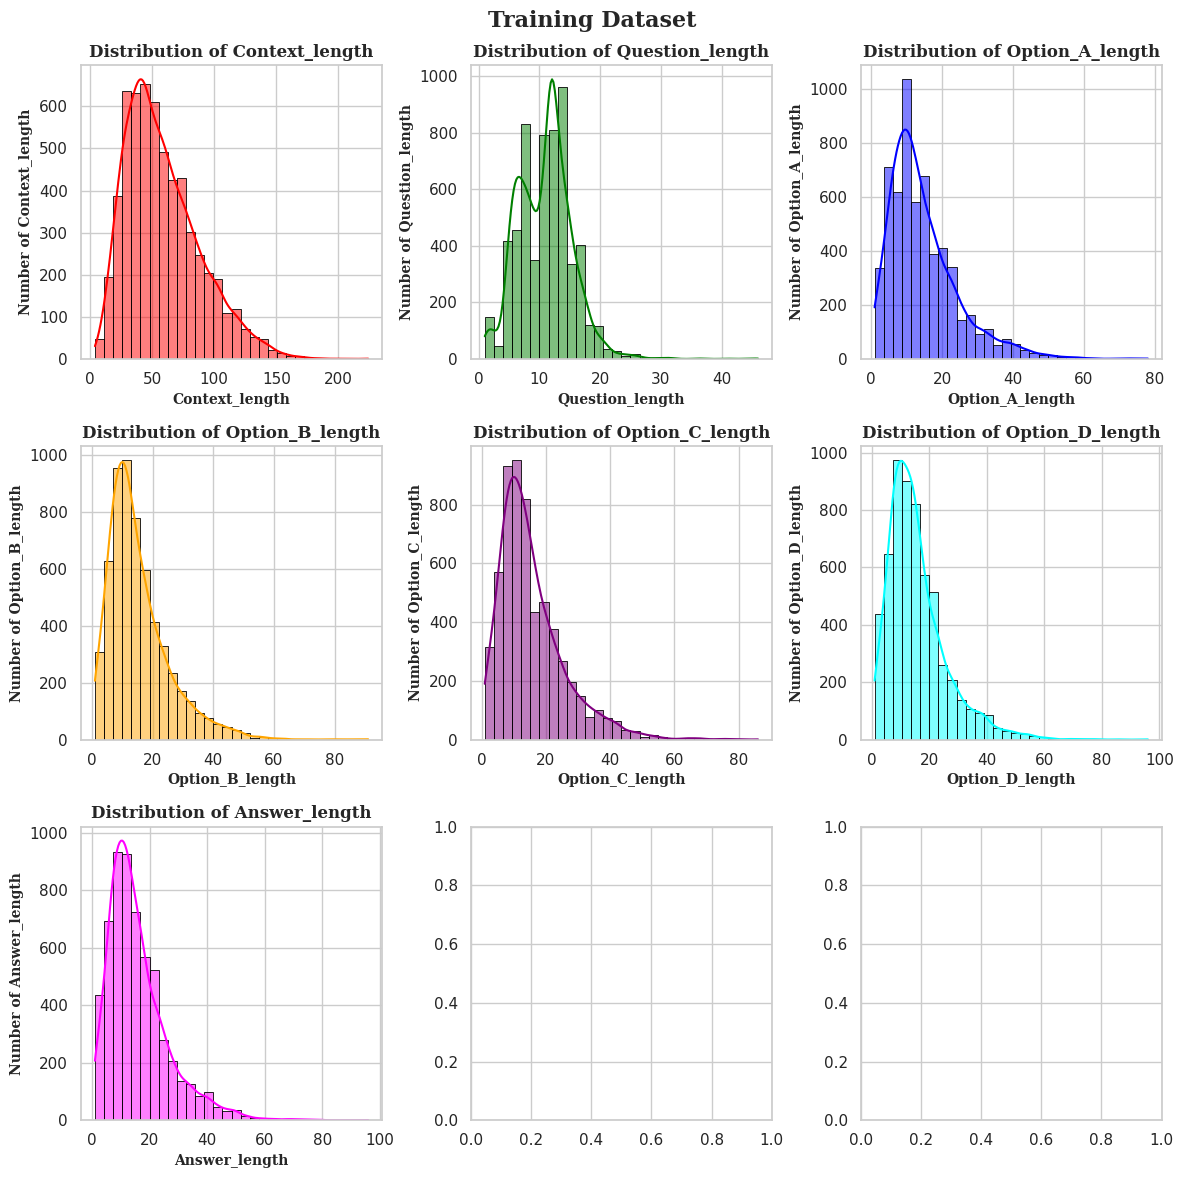

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the lengths of the columns using df_train.copy()
df_train = df_train.copy()
df_train['Context_length'] = df_train['Context'].apply(lambda x: len(str(x).split()))
df_train['Question_length'] = df_train['Question'].apply(lambda x: len(str(x).split()))
df_train['Option_A_length'] = df_train['Option A'].apply(lambda x: len(str(x).split()))
df_train['Option_B_length'] = df_train['Option B'].apply(lambda x: len(str(x).split()))
df_train['Option_C_length'] = df_train['Option C'].apply(lambda x: len(str(x).split()))
df_train['Option_D_length'] = df_train['Option D'].apply(lambda x: len(str(x).split()))
df_train['Answer_length'] = df_train['Answer'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 10, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 3 columns

# Flatten the axes to a 1D array
axes = axes.flatten()

# Plot histograms
column_names = ['Context_length', 'Question_length', 'Option_A_length', 'Option_B_length', 'Option_C_length', 'Option_D_length', 'Answer_length']
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

for i, col in enumerate(column_names):
    sns.histplot(data=df_train, x=col, bins=30, kde=True, edgecolor='black', color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontdict=font_title)
    axes[i].set_xlabel(f'{col}', fontdict=font_label)
    axes[i].set_ylabel(f'Number of {col}', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Training Dataset', fontfamily='serif', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# **Visualization of Each Column Length in Testing Dataset**

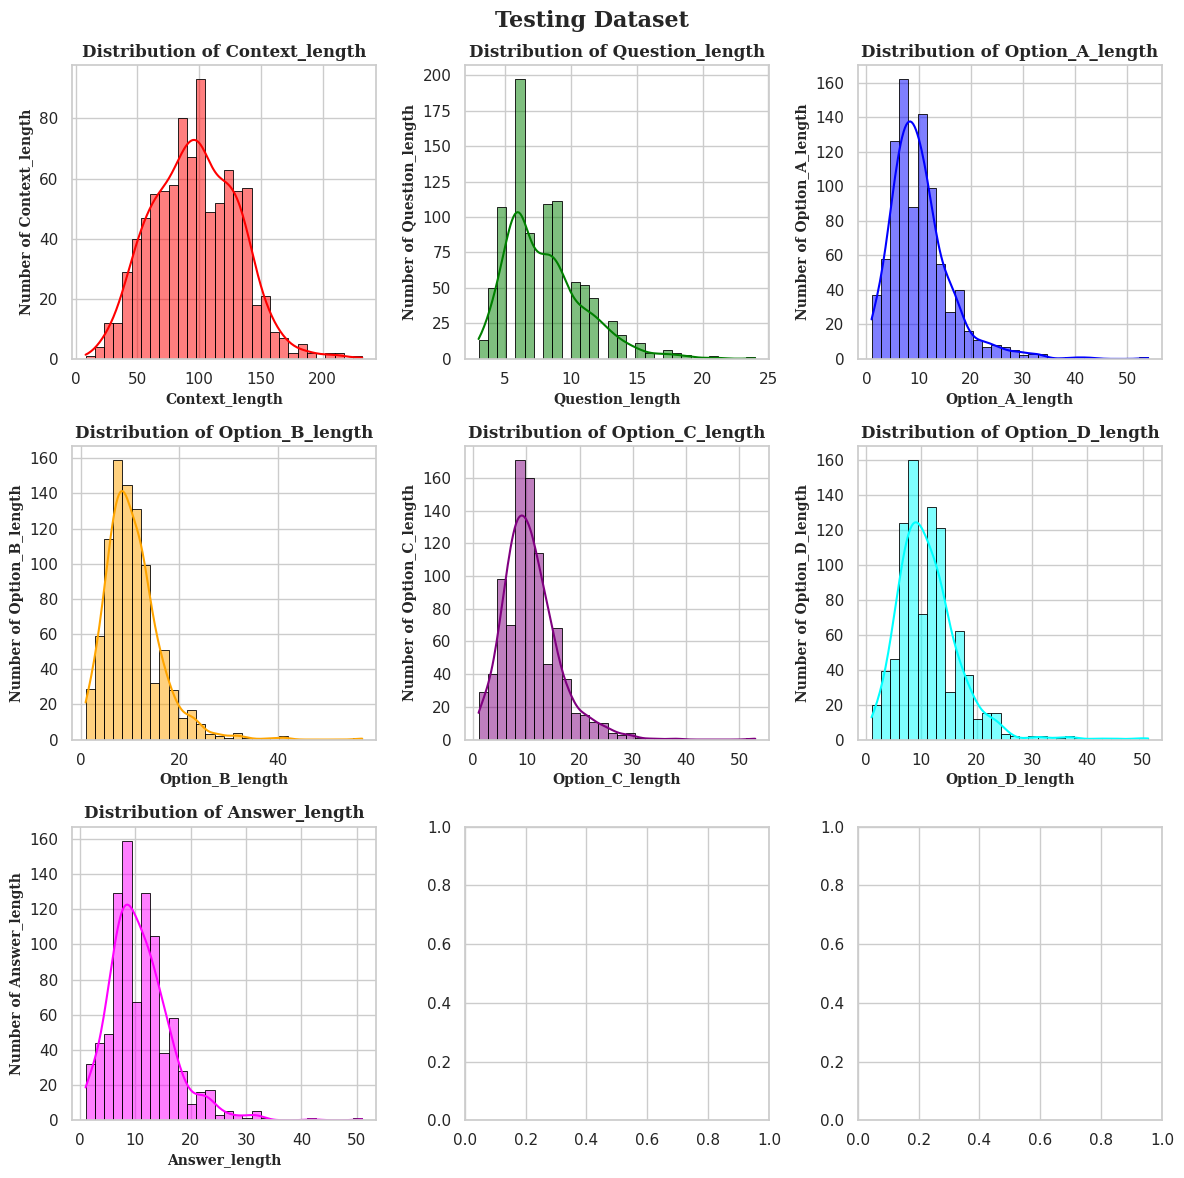

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the lengths of the columns using df_test.copy()
df_test = df_test.copy()
df_test['Context_length'] = df_test['Context'].apply(lambda x: len(str(x).split()))
df_test['Question_length'] = df_test['Question'].apply(lambda x: len(str(x).split()))
df_test['Option_A_length'] = df_test['Option A'].apply(lambda x: len(str(x).split()))
df_test['Option_B_length'] = df_test['Option B'].apply(lambda x: len(str(x).split()))
df_test['Option_C_length'] = df_test['Option C'].apply(lambda x: len(str(x).split()))
df_test['Option_D_length'] = df_test['Option D'].apply(lambda x: len(str(x).split()))
df_test['Answer_length'] = df_test['Answer'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 10, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 3 columns

# Flatten the axes to a 1D array
axes = axes.flatten()

# Plot histograms
column_names = ['Context_length', 'Question_length', 'Option_A_length', 'Option_B_length', 'Option_C_length', 'Option_D_length', 'Answer_length']
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

for i, col in enumerate(column_names):
    sns.histplot(data=df_test, x=col, bins=30, kde=True, edgecolor='black', color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontdict=font_title)
    axes[i].set_xlabel(f'{col}', fontdict=font_label)
    axes[i].set_ylabel(f'Number of {col}', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Testing Dataset', fontfamily='serif', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# **Visualization of Each Column Length in Validation Dataset**

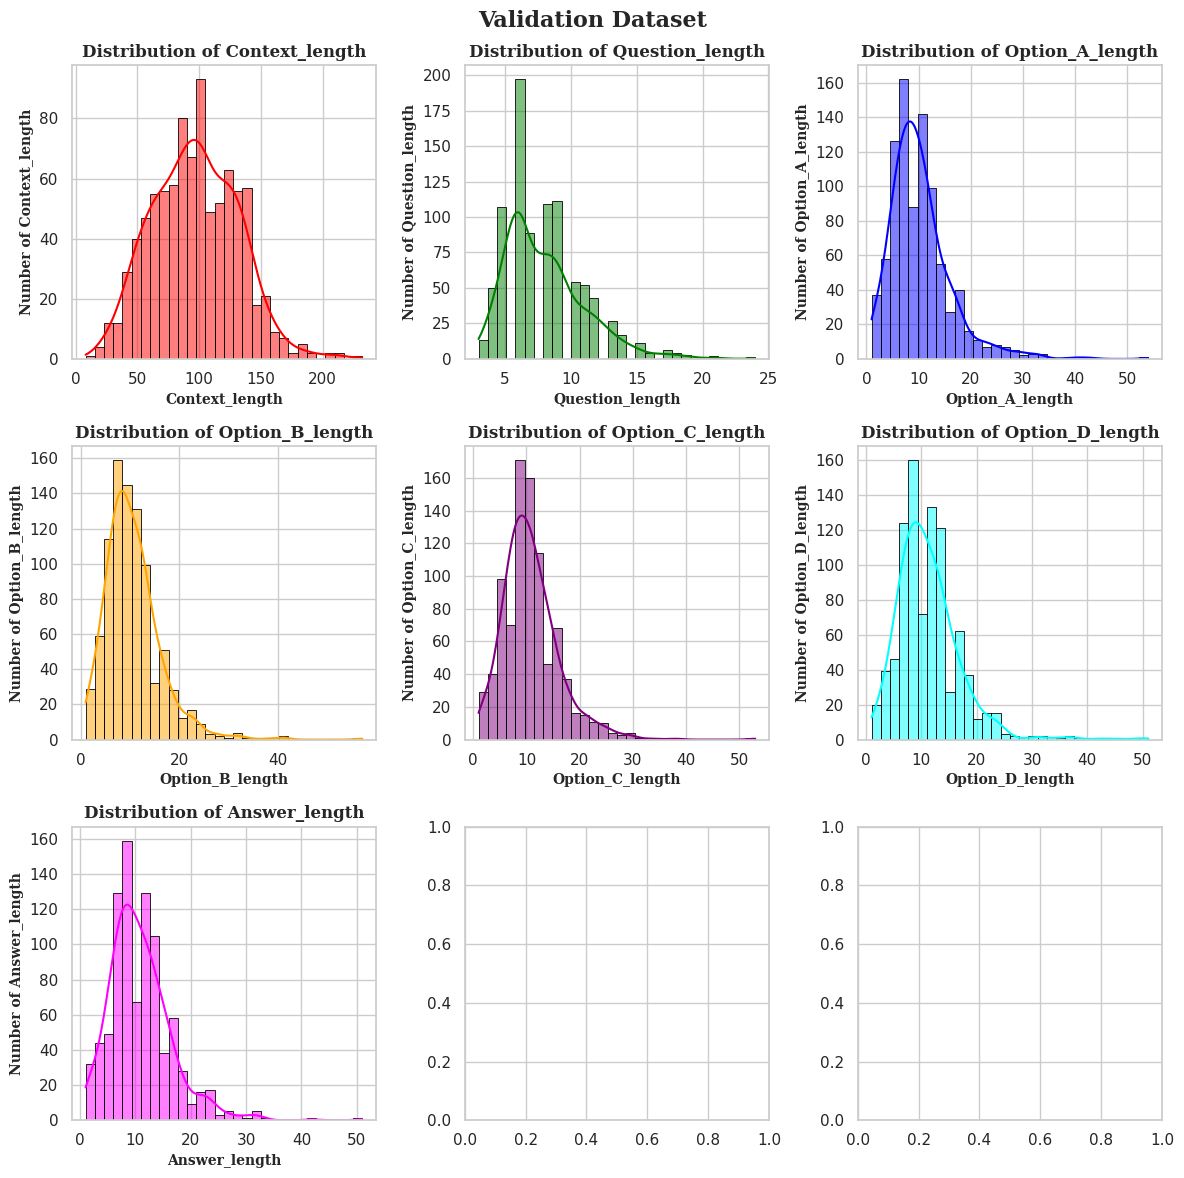

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the lengths of the columns using df_validation.copy()
df_validation = df_validation.copy()
df_validation['Context_length'] = df_validation['Context'].apply(lambda x: len(str(x).split()))
df_validation['Question_length'] = df_validation['Question'].apply(lambda x: len(str(x).split()))
df_validation['Option_A_length'] = df_validation['Option A'].apply(lambda x: len(str(x).split()))
df_validation['Option_B_length'] = df_validation['Option B'].apply(lambda x: len(str(x).split()))
df_validation['Option_C_length'] = df_validation['Option C'].apply(lambda x: len(str(x).split()))
df_validation['Option_D_length'] = df_validation['Option D'].apply(lambda x: len(str(x).split()))
df_validation['Answer_length'] = df_validation['Answer'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 10, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 3 columns

# Flatten the axes to a 1D array
axes = axes.flatten()

# Plot histograms
column_names = ['Context_length', 'Question_length', 'Option_A_length', 'Option_B_length', 'Option_C_length', 'Option_D_length', 'Answer_length']
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

for i, col in enumerate(column_names):
    sns.histplot(data=df_test, x=col, bins=30, kde=True, edgecolor='black', color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontdict=font_title)
    axes[i].set_xlabel(f'{col}', fontdict=font_label)
    axes[i].set_ylabel(f'Number of {col}', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Validation Dataset', fontfamily='serif', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words in Train Dataset**

In [ ]:
Context_words = ' '.join(df_train['Context']).split()
Question_words = ' '.join(df_train['Question']).split()
Option_A_words = ' '.join(df_train['Option A']).split()
Option_B_words = ' '.join(df_train['Option B']).split()
Option_C_words = ' '.join(df_train['Option C']).split()
Option_D_words = ' '.join(df_train['Option D']).split()
Answer_words = ' '.join(df_train['Answer']).split()


# Calculate unique words
unique_Context_words = len(set(Context_words))
unique_Question_words = len(set(Question_words))
unique_Option_A_words = len(set(Option_A_words))
unique_Option_B_words = len(set(Option_B_words))
unique_Option_C_words = len(set(Option_C_words))
unique_Option_D_words = len(set(Option_D_words))
unique_Answer_words = len(set(Answer_words))


# Display the count of unique words
print(f"Number of unique words in 'Context': {unique_Context_words}")
print(f"Number of unique words in 'Question': {unique_Question_words}")
print(f"Number of unique words in 'Option A': {unique_Option_A_words}")
print(f"Number of unique words in 'Option B': {unique_Option_B_words}")
print(f"Number of unique words in 'Option C': {unique_Option_C_words}")
print(f"Number of unique words in 'Option D': {unique_Option_D_words}")
print(f"Number of unique words in 'Answer': {unique_Answer_words}")

Number of unique words in 'Context': 38895
Number of unique words in 'Question': 5398
Number of unique words in 'Option A': 14737
Number of unique words in 'Option B': 14972
Number of unique words in 'Option C': 15241
Number of unique words in 'Option D': 15312
Number of unique words in 'Answer': 15327


# **Count of unique words in Test Dataset**

In [ ]:
Context_words = ' '.join(df_test['Context']).split()
Question_words = ' '.join(df_test['Question']).split()
Option_A_words = ' '.join(df_test['Option A']).split()
Option_B_words = ' '.join(df_test['Option B']).split()
Option_C_words = ' '.join(df_test['Option C']).split()
Option_D_words = ' '.join(df_test['Option D']).split()
Answer_words = ' '.join(df_test['Answer']).split()


# Calculate unique words
unique_Context_words = len(set(Context_words))
unique_Question_words = len(set(Question_words))
unique_Option_A_words = len(set(Option_A_words))
unique_Option_B_words = len(set(Option_B_words))
unique_Option_C_words = len(set(Option_C_words))
unique_Option_D_words = len(set(Option_D_words))
unique_Answer_words = len(set(Answer_words))


# Display the count of unique words
print(f"Number of unique words in 'Context': {unique_Context_words}")
print(f"Number of unique words in 'Question': {unique_Question_words}")
print(f"Number of unique words in 'Option A': {unique_Option_A_words}")
print(f"Number of unique words in 'Option B': {unique_Option_B_words}")
print(f"Number of unique words in 'Option C': {unique_Option_C_words}")
print(f"Number of unique words in 'Option D': {unique_Option_D_words}")
print(f"Number of unique words in 'Answer': {unique_Answer_words}")

Number of unique words in 'Context': 16709
Number of unique words in 'Question': 867
Number of unique words in 'Option A': 3301
Number of unique words in 'Option B': 3378
Number of unique words in 'Option C': 3438
Number of unique words in 'Option D': 3502
Number of unique words in 'Answer': 3423


# **Count of unique words in Validation Dataset**

In [ ]:
Context_words = ' '.join(df_validation['Context']).split()
Question_words = ' '.join(df_validation['Question']).split()
Option_A_words = ' '.join(df_validation['Option A']).split()
Option_B_words = ' '.join(df_validation['Option B']).split()
Option_C_words = ' '.join(df_validation['Option C']).split()
Option_D_words = ' '.join(df_validation['Option D']).split()
Answer_words = ' '.join(df_validation['Answer']).split()


# Calculate unique words
unique_Context_words = len(set(Context_words))
unique_Question_words = len(set(Question_words))
unique_Option_A_words = len(set(Option_A_words))
unique_Option_B_words = len(set(Option_B_words))
unique_Option_C_words = len(set(Option_C_words))
unique_Option_D_words = len(set(Option_D_words))
unique_Answer_words = len(set(Answer_words))


# Display the count of unique words
print(f"Number of unique words in 'Context': {unique_Context_words}")
print(f"Number of unique words in 'Question': {unique_Question_words}")
print(f"Number of unique words in 'Option A': {unique_Option_A_words}")
print(f"Number of unique words in 'Option B': {unique_Option_B_words}")
print(f"Number of unique words in 'Option C': {unique_Option_C_words}")
print(f"Number of unique words in 'Option D': {unique_Option_D_words}")
print(f"Number of unique words in 'Answer': {unique_Answer_words}")

Number of unique words in 'Context': 11288
Number of unique words in 'Question': 820
Number of unique words in 'Option A': 2955
Number of unique words in 'Option B': 3002
Number of unique words in 'Option C': 3037
Number of unique words in 'Option D': 3044
Number of unique words in 'Answer': 3037


In [ ]:
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install torch

In [ ]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
!transformers-cli cache clear

2023-11-23 06:49:15.650832: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 06:49:15.650900: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 06:49:15.650945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 06:49:17.763003: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: transformers-cli <command> [<args>]
Transformers CLI tool: error: argument {convert,download,env,run,serve,login,whoami,logout,repo,add-new-model,add-new-model-like,lfs-enable-largefiles,lfs-multipart-upload,pt-to-tf}: invalid choi

In [ ]:
!pip install transformers==4.10.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 17.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


In [ ]:
!pip install transformers[torch]

# **model T5 and It's tokenizer**

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import Dataset, DataLoader

# **Commonsense Reasoning Custom Dataset**

In [ ]:
class CommonsenseDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=280):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context = self.data.iloc[idx]['Context']
        question = self.data.iloc[idx]['Question']
        option_a = self.data.iloc[idx]['Option A']
        option_b = self.data.iloc[idx]['Option B']
        option_c = self.data.iloc[idx]['Option C']
        option_d = self.data.iloc[idx]['Option D']
        answer = self.data.iloc[idx]['Answer']

        # Concatenate context, question, and options
        text = f"{context} {question} {option_a} {option_b} {option_c} {option_d}"

        # Tokenize text
        inputs = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Tokenize answer
        tokenized_answer = self.tokenizer(
            answer,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Process tokenized answer labels
        labels = tokenized_answer['input_ids'].squeeze()
        attention_mask_labels = tokenized_answer['attention_mask'].squeeze()

        # Ignore padded tokens during training
        labels[attention_mask_labels == 0] = -100

        # Ensure length consistency
        labels = labels[:self.max_length]

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': labels.squeeze(),
        }


# **Dataset and Dataloader**

In [ ]:
train_dataset = CommonsenseDataset(df_train, tokenizer)
validation_dataset = CommonsenseDataset(df_validation, tokenizer)
test_dataset = CommonsenseDataset(df_test, tokenizer)

train_dataloader = DataLoader(train_dataset , batch_size=5, shuffle=True)
validation_dataloader = DataLoader(validation_dataset , batch_size=5, shuffle=False)
test_dataloader = DataLoader(test_dataset , batch_size=5, shuffle=False)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

# **Train Dataset Encoding Printing: context, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([   37,  5447,    13,  7241,   151,    12,  4752,  7248,  2401,     7,
           12,     8,  3889,    13,  7241,   151,    12,  4752,  7248,   452,
           11,  1045,   785,    21,     8,  1730,    13,  6016,  8244,     6,
           84,    65,     3,     9,   508,   866,    42,    65,   119,  2261,
         4616,     5,  4073,    13,     8,   826,    33,    59,  2479,    13,
        13929,    10,    37, 24242,  1730,    19,    12, 10164,   452,    11,
         1045,   785, 27919,  3889,  6571,     7,    38,  4374,     7,  6899,
           32,  1222,   452,    11,  1045,   785, 12021,    36,     3,     7,
           29, 14547,    53,  2045,    42,  4294,  8064,    42, 15073,     7,
        12021,    36,  2186,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    

# **Test Dataset Encoding Printing: context, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([18136,    19,     3,     9,  2077,  4382,    57,     8,   126,  8423,
          152,     9,   120,     7,    17,  9383,     6,     3, 13215,    12,
            8,   167,  5697,    11,     3,    15,     7,    32,   449,   447,
          294,    13,     8,   936,  3564,     6,    84,   963,     8,  6025,
         3149,    13,   936,  1405,    11,     8,   167,  3362,  3149,    13,
          936,  1405,     5, 10499,     9, 15198,   963,  1465,    37,  2841,
          596,    11,     8,  1465,   596,  2401,    12,   248,  6933,     6,
          298,     8,  2841,   596,    19,  6571,    15,    26,    16,   490,
          280,    38,   508,    38,   615,     6, 28986,     6, 31090,     6,
           11, 13100,     6,    38,   422,    38,    20,  7239,     6, 11761,
            6, 27983,     6, 23022,    63,     6,    11,  6263,   344,   151,
            5,     6, 17159,   115,    17,     6, 10394,     6,   672,     5,
          100,  1499,    19,     3,  4894,    10, 254

# **Validation Dataset Encoding: context, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in validation_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([    3,  2092,  1150,  1602,  2466,     6,     3,     9,  6662,  2650,
        22314,     6,   113, 11752,     8,  2833,    16,     8,  1057,  2833,
           12,   199,     8,  1687,    11,   199,     8, 21372,     6,  2832,
            3,     9,  7142,    30,     8,  1481,    16,   455,    12,  1262,
          550,     8,  2164, 15328,    16,     8,   842,    13,     8, 21372,
           11,   428,     8, 21372,     8,   579,    12,  8269,     8,  1406,
           10,   947,    34,    19,  3654,     5,  3713,  7142,    65,  1940,
            3, 11394, 21372,     8,   579,    12,  8269,     8,  1406,     5,
        23901,     8,   414,    13,  1150,  1602,  2466,     6, 22314,  1632,
            3,     9,   442,   348,     5,  3845,     3, 16804,  6141,    24,
           16,   811,    12,     3,  3770,  4842,    12,   151,     6,     3,
           88,   228,    92,  1903,    30,  8800,    12,   151,     5,  7238,
         1161,    15,     6,     3,    88,   373,   8

# **Train Dataset Decoding: context, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)



    # Break out of the loop after processing the first batch
    break


Decoded Input Text: Almost all local state-owned enterprises are the debtors of local professional banks, and most of the loss-making enterprises are linked to the bad debts of local professional banks.It is understandable that creditors object to the debtor's bankruptcy because of the fear that reconciliation will become a dead debt.The motivation of market behavior.However, many places prefer to continue to lend doctoral degrees to long-term loss-making enterprises, and continue to make loans a "dead account".This is due to the fact that Zhongyao enterprises do not go bankrupt and reflect bank performance.The indicator-"loan balance" will not fall. From this passage, we can know (). There is actually a considerable amount of "dead debt" in the "loan balance" of local professional banks The main reason why local professional banks object to corporate bankruptcy is that they are worried that bad debts will become mutual accounts The bankruptcy of loss-making companies will harm the lon

# **Test Dataset Decoding: context, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)



    # Break out of the loop after processing the first batch
    break


Decoded Input Text: Shadow is a concept proposed by the new psychoanalyst Jung, referring to the most hidden and esoteric part of the human spirit, which includes the worst aspects of human nature and the most vital aspects of human nature.Shadow includes positive The negative side and the positive side refer to great creativity, while the negative side is manifested in real life as large as war, aggression, turmoil, and corruption, as small as deception, lie, hatred, jealousy, and harm between people., Doubt, complaint, etc. This text is mainly: Explain the concept and connotation of shadow Analyzing the roots of the existence of shadows An introduction to the theory of shadow Explain how shadow affects human nature
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 

# **Validation Dataset Decoding: context, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in validation_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)


    # Break out of the loop after processing the first batch
    break


Decoded Input Text: During World War II, a volunteer named Dock, who assisted the hospital in the field hospital to help the death and help the wounded, wrote a sentence on the wall in order to drive away the dark clouds in the heart of the wounded and give the wounded the power to overcome the pain: Here it is dead.This sentence has brought countless wounded the power to overcome the pain.After the end of World War II, Dock became a postman.He firmly believed that in addition to bringing mail to people, he could also pass on happiness to people.Therefore, he always took a lot of notes with words of encouragement: "Don't worry, today is a good day", "Smile with a smile", etc.Everywhere he went, people felt happy.Ke was not a performing artist or a writer, but he did what a performing artist and a writer might not necessarily do. What is the main point of this passage? Volunteers and artists, writers Giving someone a rose Passing happiness Helping others is a loving dedication
Attention

In [ ]:
from transformers import TrainingArguments
from torch.optim import AdamW


# Create a custom optimizer using torch.optim.AdamW
custom_optimizer = AdamW(
    model.parameters(),
    lr=1e-3,  # Learning rate
    eps=1e-8,  # Epsilon value to prevent division by zero
    weight_decay=0.01,  # Weight decay (L2 regularization)
)

# Define the TrainingArguments for question answering
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Commonsense_Reasoning',
    num_train_epochs=1,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 small batches
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    save_steps=500,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=True,
    lr_scheduler_type="cosine_with_restarts",  # Setting the learning rate scheduler type
    warmup_steps=100,  # Number of warmup steps
    weight_decay=0.01,  # Weight decay (L2 regularization)
    logging_dir='/content/drive/MyDrive/Commonsense_Reasoning',  # Using the same directory for logs
    logging_steps=500,  # Log every 500 steps
)


# **Custom Datacollator**

In [ ]:
import torch
import torch.nn.functional as F
from transformers import DataCollatorForSeq2Seq

class CustomDataCollatorForSeq2Seq(DataCollatorForSeq2Seq):
    def __call__(self, features):
        batch = super().__call__(features)

        # Find the maximum length of labels in the batch
        max_label_length = max(feature["labels"].shape[-1] for feature in features)

        # Pad or truncate the "labels" arrays to have the same length
        batch["labels"] = torch.stack([
            F.pad(torch.as_tensor(feature["labels"]), (0, max_label_length - feature["labels"].shape[-1]), value=-100)
            for feature in features
        ])

        return batch




# Creating a data collator using the custom collator
data_collator = CustomDataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    padding=True,
    max_length=280,
    label_pad_token_id=tokenizer.pad_token_id,
    pad_to_multiple_of=8  # Ensuring the sequence length is a multiple of 8 (adjust as needed)
)

In [ ]:
from transformers import Trainer
# Define the Trainer with the custom optimizer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),  # Passing the custom optimizer here
)


In [ ]:
# Fine-tune the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Step,Training Loss,Validation Loss
500,0.464500,0.322194


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=737, training_loss=0.4192993805884021, metrics={'train_runtime': 441.3461, 'train_samples_per_second': 13.368, 'train_steps_per_second': 1.67, 'total_flos': 436392721121280.0, 'train_loss': 0.4192993805884021, 'epoch': 1.0})

# **Saving model and tokenizer**

In [ ]:
# Save the model
model.save_pretrained('/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Model.pt')

# Save the tokenizer
tokenizer.save_pretrained('/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Tokenizer.json')


('/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Tokenizer.json/tokenizer_config.json',
 '/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Tokenizer.json/special_tokens_map.json',
 '/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Tokenizer.json/spiece.model',
 '/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Tokenizer.json/added_tokens.json')

# **Loading trained model and tokenizer**

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the saved model
model = T5ForConditionalGeneration.from_pretrained('/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Model.pt')

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('/content/drive/MyDrive/Commonsense_Reasoning/Commonsense_QA_T5_Tokenizer.json')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# **Evaluation Metrics Installing**

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=f54d816769e0f5cada56fa7216155986c38edecd3f8c32379f513aa52d972cdf
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.6 MB/s eta 0:00:00


# **Testing the model**

In [ ]:
decoded_predictions_batch = []
decoded_references_batch = []

# Loop through the test dataset and generate predictions
for batch in test_dataloader:
    inputs = batch['input_ids'].to('cuda')  # Move inputs to the 'cuda' device
    labels = batch['labels'].to('cuda')  # Move labels to the 'cuda' device

    # Ensuring the model, inputs, and labels are on the same device
    model = model.to(inputs.device)

    # Generating answers using our model
    with torch.no_grad():
        # Generating predictions
        predictions = model.generate(inputs, max_length=250, num_beams=4, early_stopping=True)

        # Decoding generated answers
        try:
            decoded_predictions_batch.extend(tokenizer.batch_decode(predictions.cpu(), skip_special_tokens=True))
        except Exception as e:
            print("Exception occurred during decoding (predictions):", e)


        # Decoding labels for references
        try:
            # Converting labels to a list of token IDs
            labels_list = labels.cpu()
             # Decoding each label sequence
            decoded_references_batch.extend([tokenizer.decode(ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True) for ids in labels_list])
        except Exception as e:
            print("Exception occurred during decoding (references):", e)



In [ ]:
print(decoded_predictions_batch)

['Explain how shadow affects human nature', "Education now kills children's nature", 'Let go of your burden to move forward', 'Not all global climate is warming', 'Tea drinking practices vary in different regions', 'Reconsideration of biodiversity is relevant', 'Methods and strategies for learning the Western culture', 'Antibiotic resistance genes are mobile', 'The shortage of copper resources has been resolved', 'Modern European cities are very different from medieval cities and contemporary industrial cities.Medieval cities emerged and gained a foothold as a check and balance force for the rights of feudals and craftsmen', 'New discoveries in human cognition provide more opportunities for strategic innovation', 'Lack of human understanding of the nature of the food crisis', 'Reading should conform to its own characteristics', 'The development of aerospace technology can form huge social benefits', 'Congressional Resolution Affects New NASA Project', 'Young directors should be good at

In [ ]:
print(len(decoded_predictions_batch))

900


In [ ]:
print( decoded_references_batch)

['Explain the concept and connotation of shadow', 'Parents\' "utilitarian" choice is helpless', 'Setbacks in life are inevitable', 'Not all global climate is warming', 'Folk Customs Related to Tea', 'plication of A.D.NA.Sequencing Technology in Microbial Observation', 'The Necessity of Establishing the Subject Status of Chinese Culture', 'Animal husbandry should control the use of antibiotics', 'The shortage of copper resources has been resolved', 'Productive activities', 'Strategy makers should be both rational and emotional', 'Solving problems cannot be at the expense of the ecological environment', 'Breaking the limits of interest when reading', 'Space technology can ultimately benefit ordinary people', 'Budget pressure will be the main cause of suspension of large U.S.space projects', 'Give young directors more opportunities', 'How Suzhou Gardens Affect Local Gardens', 'Youth play an important role in the competition', 'Internet culture chaos must be treated with fierce medicine', 

In [ ]:
print(len(decoded_references_batch))

900


# **Metrics Loading**

In [ ]:
from evaluate import load

# Loading the evaluation metric for Character Error Rate (CER) and Word Error Rate (WER) and Exact Match(em)
cer_metric = load("cer")
wer_metric = load("wer")
exact_match_metric = load("exact_match")

# Loading BLEU and METEOR metrics
bleu_metric = load("bleu")
meteor = load('meteor')

# Calculating Character Error Rate (CER), Word Error Rate (WER) and Exact Match (EM)
results_CER = cer_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_WER = wer_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_em = exact_match_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)

# Calculating Bilingual Evaluation Understudy (BLEU) , Recall-Oriented Understudy for Gisting Evaluation (ROUGE) and METEOR(M)
results_bleu = bleu_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_met = meteor.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
print("Character Error Rate for Bangla QA:", results_CER)
print("Word Error Rate for Bangla QA:",results_WER)
print("Exact Match for Bangla QA:",results_em)
print("BLEU Score for Bangla QA:",results_bleu)
print("METEOR for Bangla QA:",results_met)

Character Error Rate for Bangla QA: 0.6152927691279014
Word Error Rate for Bangla QA: 0.7811988543371522
Exact Match for Bangla QA: {'exact_match': 0.23666666666666666}
BLEU Score for Bangla QA: {'bleu': 0.3078081184049257, 'precisions': [0.4145010910533624, 0.30548900021781744, 0.2794064422728918, 0.26928263214670983], 'brevity_penalty': 0.9852321302003078, 'length_ratio': 0.985340109460516, 'translation_length': 10082, 'reference_length': 10232}
METEOR for Bangla QA: {'meteor': 0.3831709343537886}


In [ ]:
!pip install rouge-score

In [ ]:
from rouge_score import rouge_scorer


# Initialize the Rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)

# Preprocess the text
def preprocess_text(text):
    tokens = text.split()
    return ' '.join(tokens)

# Calculate scores for each pair of predictions and references
rouge1_f1_scores = []
rouge1_precision_scores = []
rouge1_recall_scores = []
rouge2_f1_scores = []
rouge2_precision_scores = []
rouge2_recall_scores = []
rougeL_f1_scores = []
rougeL_precision_scores = []
rougeL_recall_scores = []

for ref, pred in zip(decoded_references_batch, decoded_predictions_batch):
    candidate_summary = preprocess_text(pred)
    reference_summary = preprocess_text(' '.join(ref))
    scores = scorer.score(reference_summary, candidate_summary)

    rouge1_f1_scores.append(scores['rouge1'].fmeasure)
    rouge1_precision_scores.append(scores['rouge1'].precision)
    rouge1_recall_scores.append(scores['rouge1'].recall)
    rouge2_f1_scores.append(scores['rouge2'].fmeasure)
    rouge2_precision_scores.append(scores['rouge2'].precision)
    rouge2_recall_scores.append(scores['rouge2'].recall)
    rougeL_f1_scores.append(scores['rougeL'].fmeasure)
    rougeL_precision_scores.append(scores['rougeL'].precision)
    rougeL_recall_scores.append(scores['rougeL'].recall)

# Calculate the average scores
avg_rouge1_f1 = sum(rouge1_f1_scores) / len(rouge1_f1_scores)
avg_rouge1_precision = sum(rouge1_precision_scores) / len(rouge1_precision_scores)
avg_rouge1_recall = sum(rouge1_recall_scores) / len(rouge1_recall_scores)
avg_rouge2_f1 = sum(rouge2_f1_scores) / len(rouge2_f1_scores)
avg_rouge2_precision = sum(rouge2_precision_scores) / len(rouge2_precision_scores)
avg_rouge2_recall = sum(rouge2_recall_scores) / len(rouge2_recall_scores)
avg_rougeL_f1 = sum(rougeL_f1_scores) / len(rougeL_f1_scores)
avg_rougeL_precision = sum(rougeL_precision_scores) / len(rougeL_precision_scores)
avg_rougeL_recall = sum(rougeL_recall_scores) / len(rougeL_recall_scores)

# Print the average scores
print("Average Rouge-1 F1 Score:", avg_rouge1_f1)
print("Average Rouge-1 Precision:", avg_rouge1_precision)
print("Average Rouge-1 Recall:", avg_rouge1_recall)

print("Average Rouge-2 F1 Score:", avg_rouge2_f1)
print("Average Rouge-2 Precision:", avg_rouge2_precision)
print("Average Rouge-2 Recall:", avg_rouge2_recall)

print("Average Rouge-L F1 Score:", avg_rougeL_f1)
print("Average Rouge-L Precision:", avg_rougeL_precision)
print("Average Rouge-L Recall:", avg_rougeL_recall)


Average Rouge-1 F1 Score: 0.007729857232325108
Average Rouge-1 Precision: 0.0238654430483596
Average Rouge-1 Recall: 0.004957174901501892
Average Rouge-2 F1 Score: 0.00012194614922471147
Average Rouge-2 Precision: 0.0003665123456790123
Average Rouge-2 Recall: 7.354103998008061e-05
Average Rouge-L F1 Score: 0.007705437207905084
Average Rouge-L Precision: 0.02378607796899452
Average Rouge-L Recall: 0.0049427448870718775


# **Save original answer and generated answer to a csv file**

In [ ]:
# Create a DataFrame to store answers
generated_answer_df = pd.DataFrame({
    'Context': df_test['Context'],
    'Question': df_test['Question'],
    'Option A': df_test['Option A'],
    'Option B': df_test['Option B'],
    'Option C': df_test['Option C'],
    'Option D': df_test['Option D'],
    'Reference_Answer': decoded_references_batch,
    'Generated_Answer': decoded_predictions_batch
})

# Save generated answers to a CSV file
generated_answer_df.to_csv("/content/drive/MyDrive/Commonsense_Reasoning/T5_generated_answers.csv", index=False)


# **Word Information Lost Calculation**

In [ ]:
def calculate_word_information_lost(original_answer, generated_answer):
    # Tokenize the text into unique tokens
    original_tokens = set(original_answer.split())
    generated_tokens = set(generated_answer.split())

    # Calculate the number of unique tokens before and after processing
    num_original_tokens = len(original_tokens)
    num_generated_tokens = len(generated_tokens)

    # Calculate Word Information Lost (WIL)
    wil = 1 - (num_generated_tokens / num_original_tokens) if num_original_tokens != 0 else 0

    return wil

In [ ]:
WIL_df = pd.read_csv("/content/drive/MyDrive/Commonsense_Reasoning/T5_generated_answers.csv")
WIL_df.head()

,Context,Question,Option A,Option B,Option C,Option D,Reference_Answer,Generated_Answer
0,Shadow is a concept proposed by the new psycho...,This text is mainly:,Explain the concept and connotation of shadow,Analyzing the roots of the existence of shadows,An introduction to the theory of shadow,Explain how shadow affects human nature,Explain the concept and connotation of shadow,Explain how shadow affects human nature
1,"At present, education-related topics often app...",The text is intended to explain:,Demand for high-quality education resources in...,Educational experts' perspective divorces from...,Education now kills children's nature,"Parents' ""utilitarian"" choice is helpless","Parents' ""utilitarian"" choice is helpless",Education now kills children's nature
2,Such a ship is moored in the British National ...,The gist of this text is:,Let go of your burden to move forward,Farewell to the past,Setbacks in life are inevitable,Failure is the mother of success,Setbacks in life are inevitable,Let go of your burden to move forward
3,"According to reports, although current news ab...",The text is intended to explain:,Not all global climate is warming,Slow growth in sea ice in Antarctica,Growing areas of Antarctica sea ice,Reports on global warming are seriously mislea...,Not all global climate is warming,Not all global climate is warming
4,The customary behavior pattern in the process ...,This text mainly introduces:,Tea culture in ancient poetry,Folk Customs Related to Tea,There are many ways to drink tea and tea art,Tea drinking practices vary in different regions,Folk Customs Related to Tea,Tea drinking practices vary in different regions


In [ ]:
# Apply the function row-wise using apply along with axis=1
WIL_df['Word_Information_Lost'] = WIL_df.apply(lambda row: calculate_word_information_lost(row['Reference_Answer'], row['Generated_Answer']), axis=1)

# Display the resulting DataFrame with the Word Information Lost column
WIL_df.head()


,Context,Question,Option A,Option B,Option C,Option D,Reference_Answer,Generated_Answer,Word_Information_Lost
0,Shadow is a concept proposed by the new psycho...,This text is mainly:,Explain the concept and connotation of shadow,Analyzing the roots of the existence of shadows,An introduction to the theory of shadow,Explain how shadow affects human nature,Explain the concept and connotation of shadow,Explain how shadow affects human nature,0.142857
1,"At present, education-related topics often app...",The text is intended to explain:,Demand for high-quality education resources in...,Educational experts' perspective divorces from...,Education now kills children's nature,"Parents' ""utilitarian"" choice is helpless","Parents' ""utilitarian"" choice is helpless",Education now kills children's nature,0.000000
2,Such a ship is moored in the British National ...,The gist of this text is:,Let go of your burden to move forward,Farewell to the past,Setbacks in life are inevitable,Failure is the mother of success,Setbacks in life are inevitable,Let go of your burden to move forward,-0.600000
3,"According to reports, although current news ab...",The text is intended to explain:,Not all global climate is warming,Slow growth in sea ice in Antarctica,Growing areas of Antarctica sea ice,Reports on global warming are seriously mislea...,Not all global climate is warming,Not all global climate is warming,0.000000
4,The customary behavior pattern in the process ...,This text mainly introduces:,Tea culture in ancient poetry,Folk Customs Related to Tea,There are many ways to drink tea and tea art,Tea drinking practices vary in different regions,Folk Customs Related to Tea,Tea drinking practices vary in different regions,-0.400000


In [ ]:
# Calculate the mean Word Information Lost across all rows
mean_wil = WIL_df['Word_Information_Lost'].mean()
print(f"Mean Word Information Lost (WIL): {mean_wil:.2f}")

Mean Word Information Lost (WIL): -0.10
